**Dengue** is a dangerous disease. I got hit by dengue once, back in 2013 and I know how bad things can be in that situation. In this notebook we will try to explore the dataset as much as possible in order to get valuable information so that it can be used to help prevent dengue in future. Let's start.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import os
import glob
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
color = sns.color_palette()
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

denguecases.csv



In [2]:
data = pd.read_csv('../input/denguecases.csv')

In [3]:
data.head()

,Month,Year,Region,Dengue_Cases
0,Jan,2008,Region.I,2.953926
1,Feb,2008,Region.I,2.183336
2,Mar,2008,Region.I,0.972410
3,Apr,2008,Region.I,9.357156
4,May,2008,Region.I,7.320599


In [4]:
# A quick overview of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 4 columns):
Month           1836 non-null object
Year            1836 non-null int64
Region          1836 non-null object
Dengue_Cases    1836 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 57.5+ KB


In [5]:
# Check for any null/missing values
data.isnull().sum()

Month           0
Year            0
Region          0
Dengue_Cases    0
dtype: int64

In [6]:
# The number of cases in any month corresponding to a year are given as floats. Let's round off
data['Dengue_Cases'] = data['Dengue_Cases'].apply(lambda x : np.round(x).astype(np.uint8))
data.head()

,Month,Year,Region,Dengue_Cases
0,Jan,2008,Region.I,3
1,Feb,2008,Region.I,2
2,Mar,2008,Region.I,1
3,Apr,2008,Region.I,9
4,May,2008,Region.I,7


In [7]:
# How many regions are there?
regions_count = data.Region.value_counts()
print("Total number of regions : ", len(regions_count))
print("Regions along with the number of occurrences")
print(regions_count)

Total number of regions :  17
Regions along with the number of occurrences
NCR            108
Region.VIII    108
CAR            108
ARMM           108
CARAGA         108
Region.I       108
Region.IV.B    108
Region.X       108
Region.II      108
Region.IX      108
Region.XI      108
Region.III     108
Region.XII     108
Region.VII     108
Region.VI      108
Region.IV.A    108
Region.V       108
Name: Region, dtype: int64


In [8]:
print("Minimum number of dengue cases : ", np.min(data.Dengue_Cases.values))
print("Maximum number of dengue cases : ", np.max(data.Dengue_Cases.values))
print("Average number of dengue cases : ", int(np.mean(data.Dengue_Cases.values)))

Minimum number of dengue cases :  0
Maximum number of dengue cases :  147
Average number of dengue cases :  11


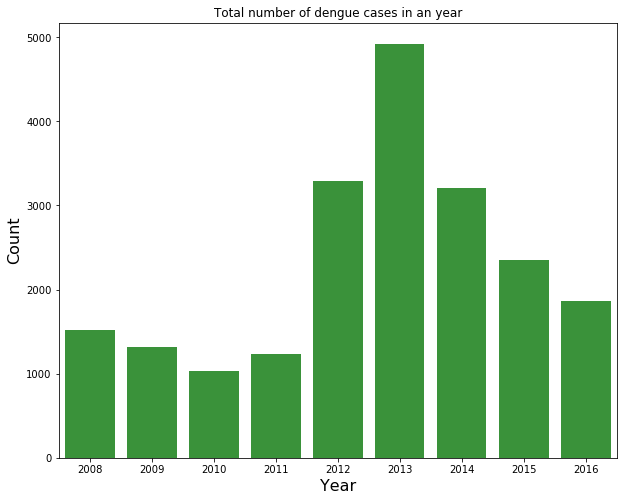

In [9]:
# What's the count of cases for each year?
data_groups = data.groupby(['Year'])
year = []
cases = []

for name, group in data_groups:
    year.append(name)
    cases.append(group['Dengue_Cases'].sum())

plt.figure(figsize=(10,8))    
sns.barplot(x=year, y=cases, color=color[2])
plt.title('Total number of dengue cases in an year')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()

The number of cases increased significantly from 2010 to 2013(with the mximum number of cases in a year). The good thing is that after 2013 there is a good drop in the cases and I hope 2017 will be much better than 2016.

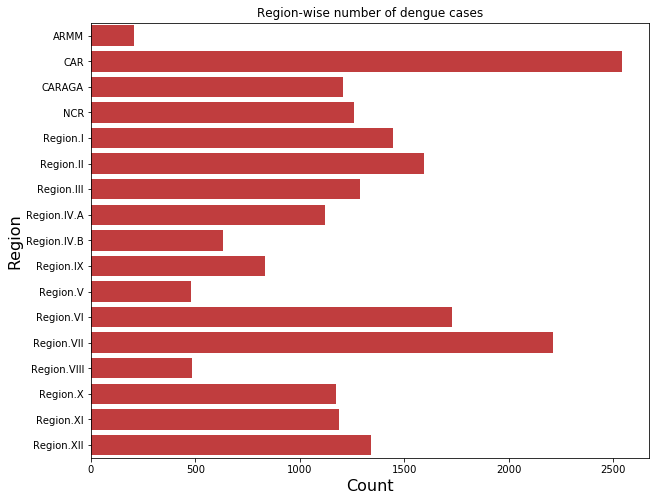

In [10]:
# What about the regions? Waht are the cases count as per the regions?
data_groups = data.groupby(['Region'])

regions = []
cases = []

for name, group in data_groups:
    regions.append(name)
    cases.append(group['Dengue_Cases'].sum())

plt.figure(figsize=(10,8))    
sns.barplot(y=regions, x=cases, color=color[3], orient='h')
plt.title('Region-wise number of dengue cases')
plt.xlabel('Count', fontsize=16)
plt.ylabel('Region', fontsize=16)
plt.yticks(range(len(regions)), regions)
plt.show()

CAR (Cordillera Administrative Region) is the region where maximum number of dengue cases are found. As per Wiki, it is the least densely populated area. Even then, so many number of cases? This might be because of lack of awareness among the people living there.  On the other hand, ARMM is the the region with least count of dengue cases.

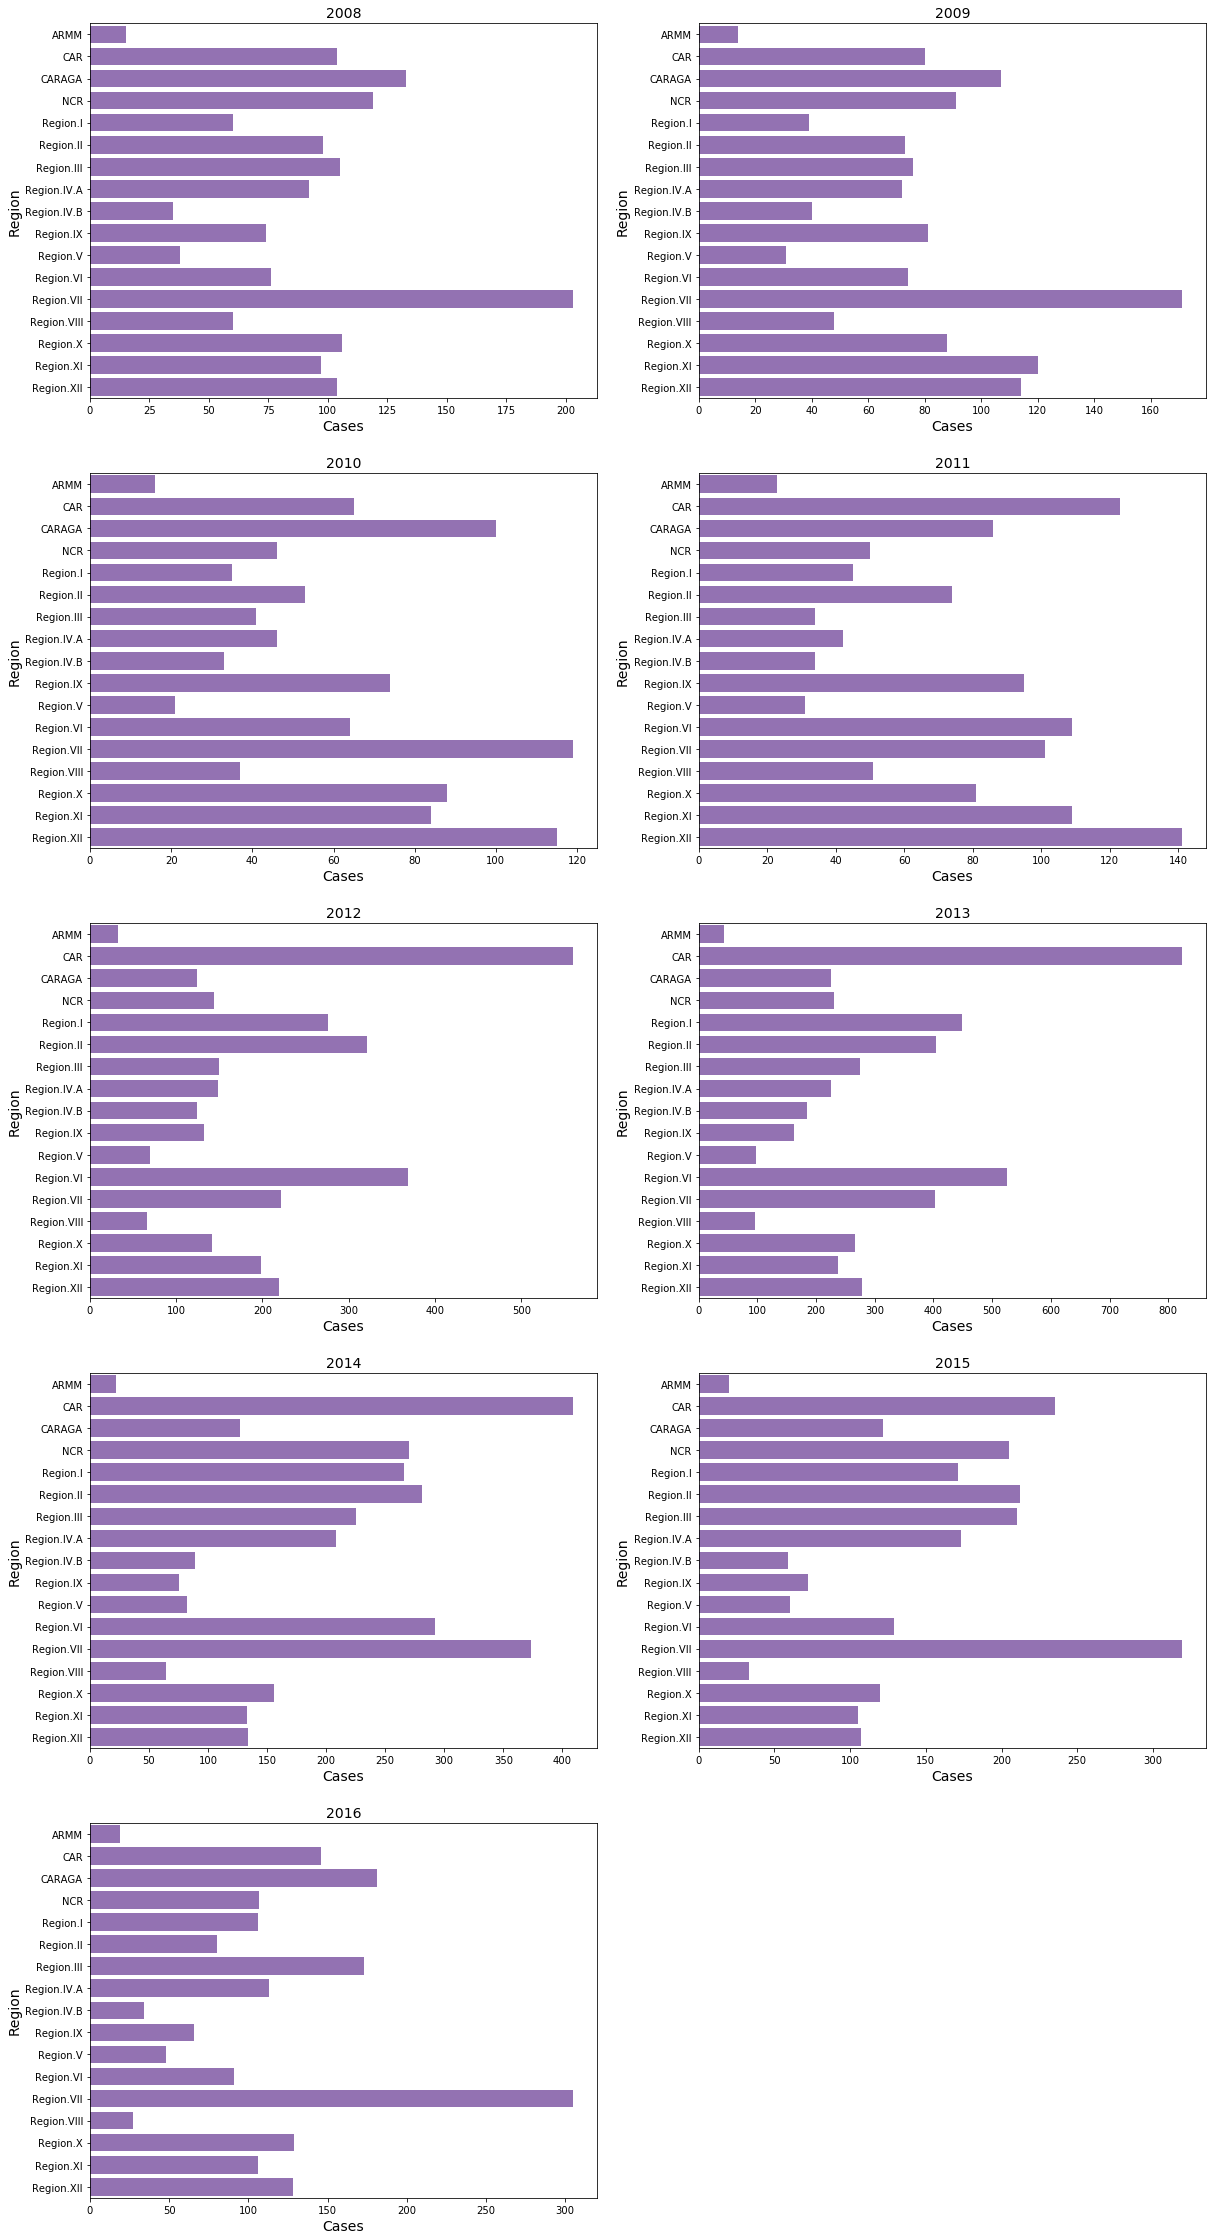

In [11]:
# What about the count per region in each year?
data_groups = data.groupby(['Year'])

f,axs = plt.subplots(5,2, figsize=(20,40), sharex=False, sharey=False)
for i,(year, group) in enumerate(data_groups):
    regions = []
    cases = []
    region_group = group.groupby(['Region'])
    for region, df in region_group:
        regions.append(region)
        cases.append(df['Dengue_Cases'].sum())
    sns.barplot(y=regions, x=cases, color=color[4], orient='h', ax=axs[i//2, i%2])
    axs[i//2, i%2].set_title(year, fontsize=14)
    axs[i//2, i%2].set_xlabel("Cases", fontsize=14)
    axs[i//2, i%2].set_ylabel("Region", fontsize=14)
f.delaxes(axs[4][1])
plt.show()    

The above plot is too interesting. Earlier we found that CAR was the region with maximum number of case but this isn't true for all years. Here are some good insights:

* Graph of 2008 and 2009 is almost similar.
* Maximum number of cases were reported for Region vii during 2008-10.
* There was a sudden rise in number of cases reported in Region xii during 2010-11.
* ARMM is the only region where the number of dengue cases has always been the least. That means people are aware here about it.
* From 2011-13, there was a dip in the number of cases for Region vii but then there is a sudden increase in the number of dengue cases for this region in the recent years(2014-16). I don't know what happened here.

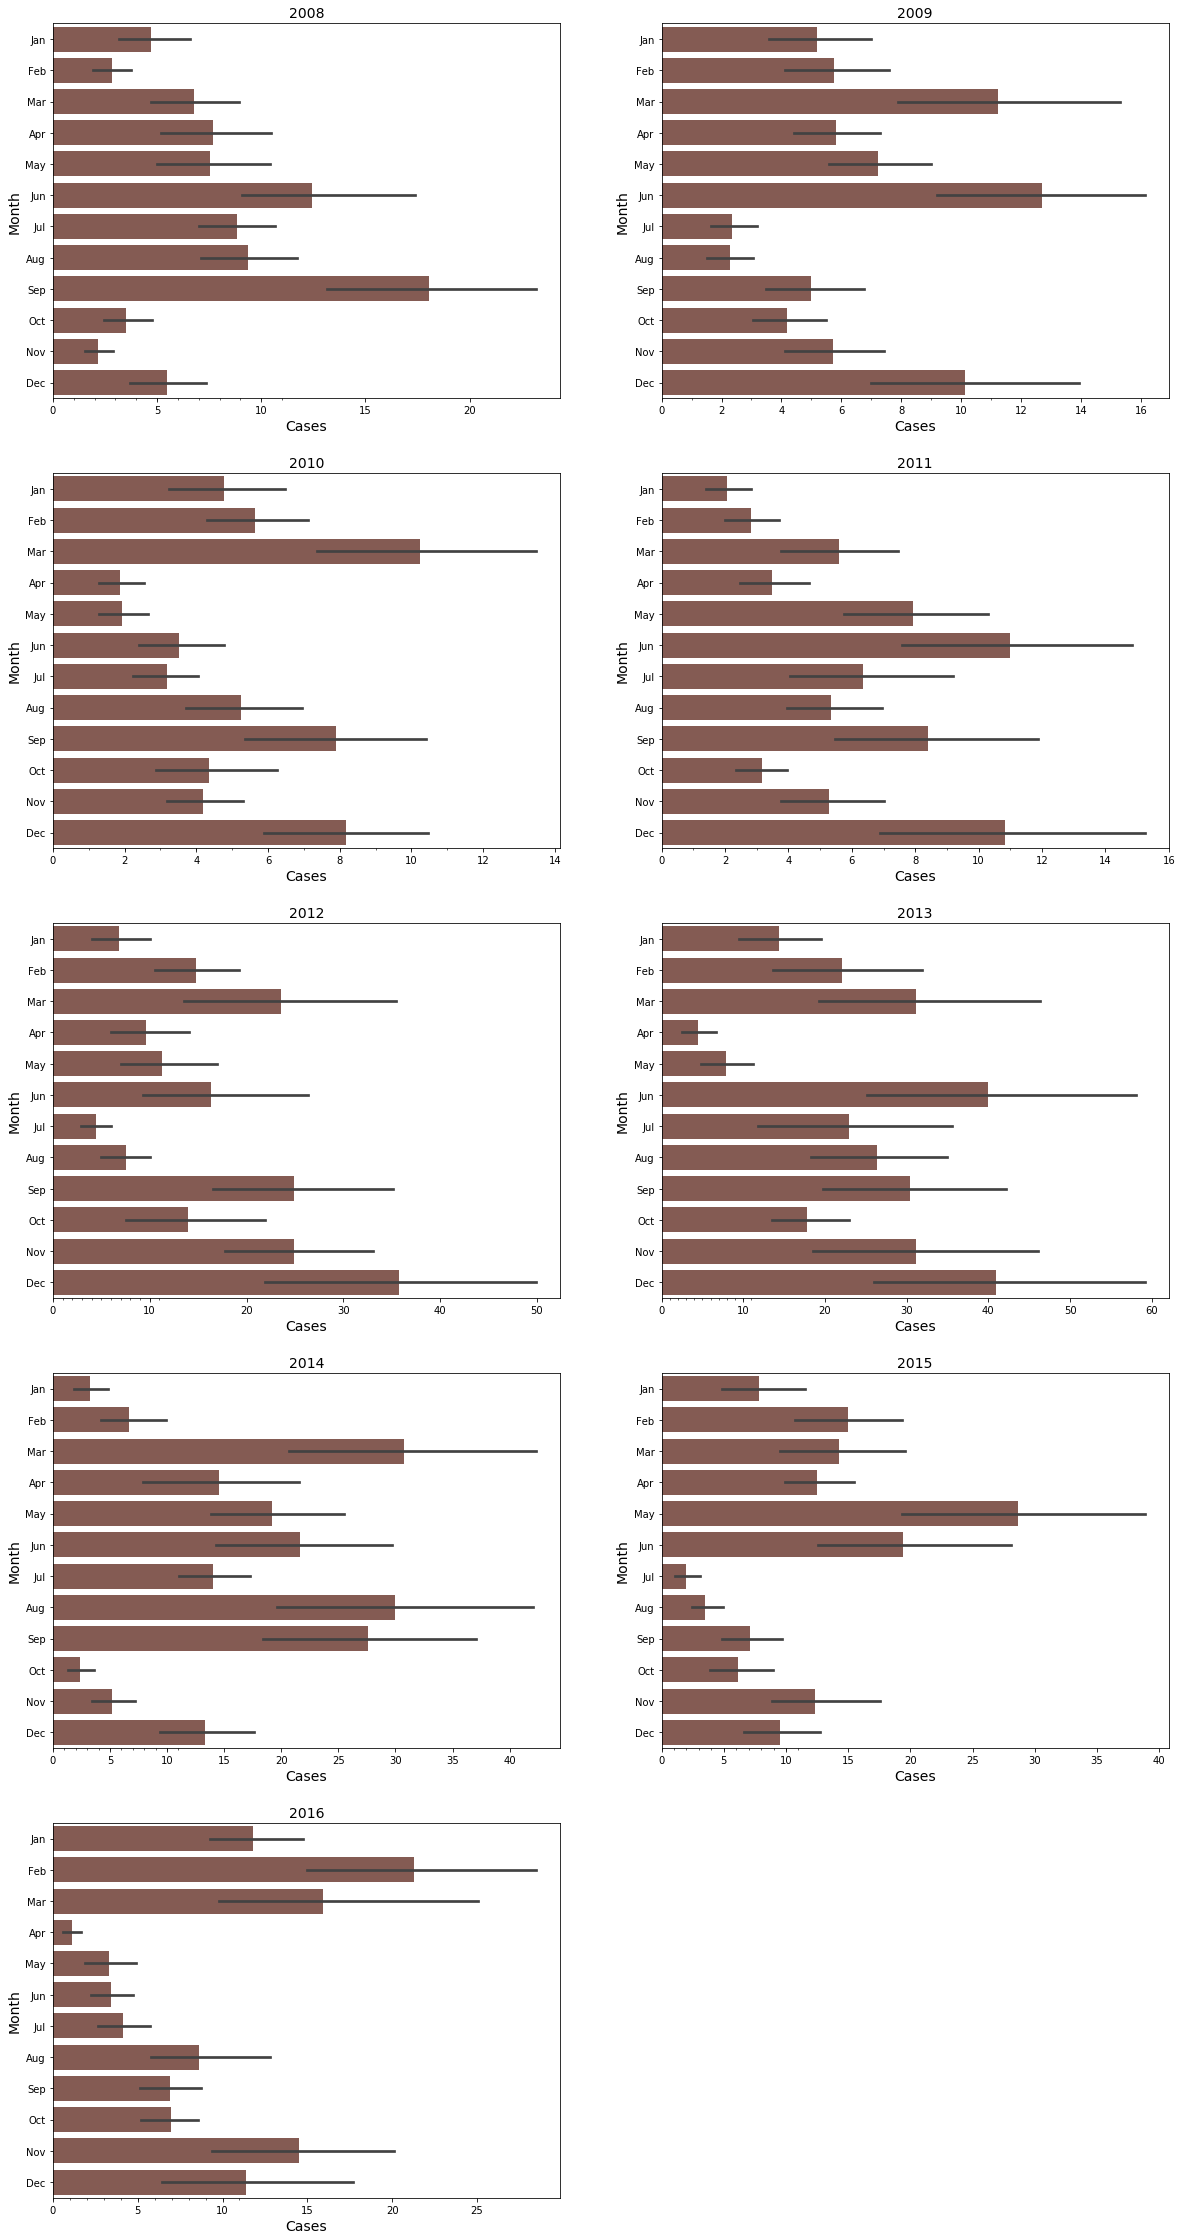

In [12]:
# Let's do some monthly analysis now.
data_groups = data.groupby(['Year'])
months = ('Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
f,axs = plt.subplots(5,2, figsize=(20,40), sharex=False, sharey=False)
for i,(year, group) in enumerate(data_groups):
    sns.barplot(y=group['Month'], x=group['Dengue_Cases'], color=color[5], orient='h', ax=axs[i//2, i%2])
    axs[i//2, i%2].set_title(year, fontsize=14)
    axs[i//2, i%2].set_xlabel("Cases", fontsize=14)
    axs[i//2, i%2].set_ylabel("Month", fontsize=14)
    axs[i//2, i%2].set_xticks(range(len(months)), months)
f.delaxes(axs[4][1])
plt.show()    

That's it for now. If you find this notebook useful, fork it. Play with the data. Also, any feedback to improve the quality of code or visualizations would be greatly appreciated. And please don't forget to upvote.